In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
from matplotlib import colors

from astropy.io import fits

import dmsky.targets
from dmsky.utils.units import Units

In [2]:
# Build the library of pre-defined targets
library = dmsky.targets.TargetLibrary()

Using /Users/kadrlica/fermi/software/dmsky/dmsky/data/targets for TargetLibrary


In [3]:
# Create the target    
name = 'draco:martinez2015_nfw'
draco = library.create_target(name)

/Users/kadrlica/fermi/software/dmsky/dmsky/jcalc.py:380: RuntimeWarning: divide by zero encountered in log10
  return np.log10([_dhalo, _psi, _jval])


Target J-factor: 7.18879774458e+18
Integrated J-factor: 7.14786034306e+18


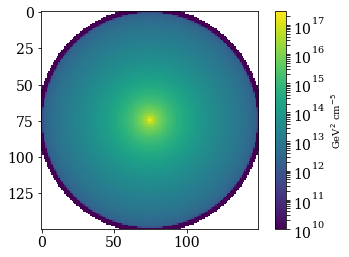

In [4]:
# Create a template image and associate wcs
image,pix,wcs = draco.create_jmap(npix=150,subsample=8,coordsys='CEL',projection='AIT')
# The image is in the default units [cgs]
image = Units.convert_to(image,'GeV2 / cm5')
# Calculate the pixel area in steradians
area = np.radians(wcs.wcs.cdelt[0])**2

plt.imshow(image*area,norm=colors.LogNorm(),vmin=1e10)
plt.colorbar(label='GeV$^{2}$ cm$^{-5}$')

print "Target J-factor:",draco.j_integ
print "Integrated J-factor:",(image*area).sum()

The integrated J-factor from the template image is biased at the ~0.5% level for this image resolution. Increasing the resolution will decrease this bias to ~0.3%, but not any further. This suggests that there may be an intrinsic bias, possibly coming from the projection.

Writing draco_template.fits...
2.2768473027e-29
0.0


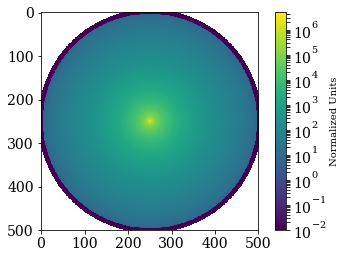

In [5]:
# Write the WCS image
# Note that the template file is normalized to 1 per sr (following on pointlike)
# (Also note that I am not that happy with the form of this function call.)
filename = 'draco_template.fits'
print "Writing %s..."%filename
draco.write_jmap_wcs(filename,npix=500,clobber=True,map_kwargs=dict(subsample=4))

# And now read the image back in
hdu = fits.open(filename)[1]
data = hdu.data
header = hdu.header

# The template has been normalized to unity, but the original normalizations are stored in the header
print header['NORM']
print header['NORMERR']

# Otherwise, the map looks the same
plt.imshow(data,norm=colors.LogNorm(),vmin=1e-2)
plt.colorbar(label = "Normalized Units")

It should be possible to create templates iterating over a roster following the framework described in `roster_example.ipynb`.